# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Polarization-encoder-with-simpy" data-toc-modified-id="Polarization-encoder-with-simpy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarization encoder with simpy</a></div><div class="lev2 toc-item"><a href="#Definitions-of-variables-for-the-problem" data-toc-modified-id="Definitions-of-variables-for-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Definitions of variables for the problem</a></div><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2 toc-item"><a href="#Incident-field" data-toc-modified-id="Incident-field-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Incident field</a></div><div class="lev2 toc-item"><a href="#Grating-definition" data-toc-modified-id="Grating-definition-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Grating definition</a></div><div class="lev2 toc-item"><a href="#Diffraction-gratings" data-toc-modified-id="Diffraction-gratings-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Diffraction gratings</a></div><div class="lev1 toc-item"><a href="#Polarization-matrices" data-toc-modified-id="Polarization-matrices-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Polarization matrices</a></div><div class="lev1 toc-item"><a href="#Signals" data-toc-modified-id="Signals-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Signals</a></div>

# Polarization encoder with simpy
**Author** Luis Miguel Sánchez Brea

**Date** 21/06/2017

The objective of this notebook is to analyze self-imaging formation with a polarization grating formed by slits with two different polarization properties, given by Jones matrices:
\begin{equation}
P_1=\left[\begin{array}{cc}
a_1 & b_1\\
c_1 & d_1
\end{array}\right]
\end{equation}
for the first set of slits and 
\begin{equation}
P_2=\left[\begin{array}{cc}
a_2 & b_2\\
c_2 & d_2
\end{array}\right]
\end{equation}
for the second set of slits.
We perform a vectorial analysis in $(E_x, E_y)$ fields, depreciating $E_z$ component (paraxial vector field).


## Definitions of variables for the problem

For this problem, perhaps all these defintions should go in a .py module (with sympy)

In [1]:
%matplotlib notebook
import sympy
from sympy import *

from sympy import init_session
init_session(quiet=True)

um=1

IPython console for SymPy 1.0 (Python 2.7.12-64-bit) (ground types: python)


In [2]:
theta = sympy.symbols('\\theta', real=True, positive=True)
alpha, beta, gamma, delta = sympy.symbols('\\alpha, \\beta, \\gamma, \\delta', real=True, positive=True)
E1,E2 = sympy.symbols('E_{1}, E_{2}', complex=True, positive=True)
E0x,E0y = sympy.symbols('E_{0x}, E_{0y}', complex=True, positive=True)
E1x,E1y = sympy.symbols('E_{1x}, E_{1y}', complex=True, positive=True)
P1,P2 = sympy.symbols('P_1, P_2', complex=True, positive=True)
a1, b1, c1, d1 = sympy.symbols('a_1, b_1, c_1, d_1', complex=True, positive=True)
a2, b2, c2, d2 = sympy.symbols('a_2, b_2, c_2, d_2', complex=True, positive=True)

t,t1s, t2s = sympy.symbols('t, t_{1s},t_{2s}', complex=True, positive=True)


In [3]:
def intensity(v):
    #Calculo de la intensity
    return sympy.expand(v[0]*sympy.conjugate(v[0]) + v[1]*sympy.conjugate(v[1]))

# Introduction
Let us consider a diffraction grating with period $p$ and characterized by two different polarization properties, given by $P_1$ and $P_2$. The grating can be caracterized by the sum of two amplitude gratings.

## Incident field
The initial field is a plane wave with a certain polarization, and incidence angle. To simplify the results, we consider normal incidence.

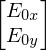

In [4]:
E0=sympy.Matrix([[E0x],[E0y]])
E0
    

## Grating definition
For a scalar grating the transmitance is given by 
\begin{equation}
t_{1 scalar}(x)=\sum a_{l}e^{iql(x-\Delta x)}
\end{equation}
Since these slits are polarized, then the can be described by 
One of the slits set, is characterized by
\begin{equation}
t_1(x)	= P_1 \, t_{scalar}(x)
	=\left(\begin{array}{cc}
a_{1} & b_{1}\\
c_{1} & d_{1}
\end{array}\right)\sum a_{l}e^{iql(x-\Delta x)}
\end{equation}
Since $1=t_{1 scalar}(x)+t_{2 scalar}(x)$, the other grating sets is located at 
\begin{equation}
t_{2 scalar}(x)	= 1-t_{1 scalar}(x)
\end{equation}
and the polarization is given by 
\begin{equation}
t_{2}(x)	=P_{2}\left[1-t_{scalar}(x)\right]=\left(\begin{array}{cc}
a_{2} & b_{2}\\
c_{2} & d_{2}
\end{array}\right)\left[1-\sum a_{l}e^{iql(x-\Delta x)}\right]
\end{equation}
Since there is a reflection over the grating, the the field just after the grating is the multipliation of the total reflectance by the incident field
\begin{equation}
\end{equation}

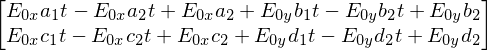

In [5]:
P1=sympy.Matrix([[a1,b1],[c1,d1]])
P2=sympy.Matrix([[a2,b2],[c2,d2]])

t1=P1*t
t2=P2*(1-t)

E1=sympy.factor((t1+t2)*E0)
E1


In [38]:
E0 = {E0x:1/sympy.sqrt(2), E0y: 1/sympy.sqrt(2)}
pol1={a1: 1, b1: 0, c1:0, d1:0}
pol2={a2: 0, b2: 0, c2:0, d2:1}

pol1={a1: 1, b1: 0, c1:0, d1:I}
pol2={a2: 1, b2: 0, c2:0, d2:-I}

conditions=E0.copy()
conditions.update(pol1)
conditions.update(pol2)

E_f=E1.subs(conditions)
print E_f

I_f=sympy.expand(intensity(E_f))
print sympy.factor(I_f)

Matrix([
[                sqrt(2)/2],
[sqrt(2)*I*t - sqrt(2)*I/2]])
2*t**2 - 2*t + 1


In [39]:
sympy.expand(intensity(E1.subs(conditions)))

## Diffraction gratings

In [8]:
t

# Polarization matrices

In [30]:
def rotation(theta):
    return sympy.Matrix([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]])    

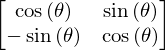

In [31]:
rotation(theta)

In [32]:
def polarizer_linear(theta):
    PL0=sympy.Matrix([[1,0],[0,0]])
    return rotation(-theta)*PL0*rotation(theta)

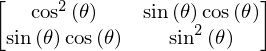

In [33]:
polarizer_linear(theta)

# Signals
Definition of polarizer in order to measure signals

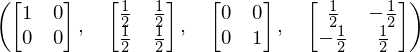

In [40]:
pa = polarizer_linear(0)
pb = polarizer_linear(pi / 4)
pna = polarizer_linear(pi / 2)
pnb = polarizer_linear(3 * pi / 4)
pa, pb, pna, pnb

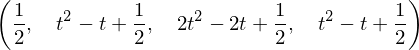

In [42]:
Sa = intensity(pa*E_f)
Sb = intensity(pb*E_f)
Sna = intensity(pna*E_f)
Snb = intensity(pnb*E_f)
Sa, Sb, Sna, Snb

In [43]:
SA=sympy.factor(Sa-Sna,t)
SB=sympy.factor(Sb-Snb,t)
SA,SB

In [15]:
def polarizer_retarder(phase=pi, ne=1, no=1, d=1 * um, wavelength=0.6328 * um, theta=0):
    """Retardador
	   Se puede compute de dos formas. Si phase es distinto de None, entonces es lo que manda,
	   Si phase=None, entonces se calcula el phase con el resto de cosas.
	  - phase: phase del rotador definido como 2*pi*(ne-no)*d/lambda
	  - ne: index extraordinario, no: índice ordinario, d: thickness de la lámina, wavelength: longitud de onda
	  - theta: angle de rotación
	"""
    #Definicion del retardo
    if phase == None:
        phase = 2 * pi * (ne - no) * d / wavelength

    #Definicion de la matrix del retardador
    Lretardo = sympy.Matrix([[1, 0], [0, sympy.exp(I * phase)]], dtype=complex)

    return rotation(-theta) * Lretardo * rotation(theta)

In [16]:
def quarter_waveplate(theta=0):
    """lamina lambda/4. Muy utilizada porque pasa de luz linealmente polarizada a luz circularmente polarizada
	"""
    #Definicion de la matrix
    return polarizer_retarder(phase=pi / 2, theta=theta)

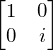

In [17]:
quarter_waveplate(0)

In [18]:
def half_waveplate(theta=0):
    """lamina lambda/2. Muy utilizada porque gira el estado de polarization
	"""
    #Definicion de la matrix
    return polarizer_retarder(phase=pi, theta=theta)

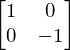

In [19]:
half_waveplate(0)

In [20]:
def linear_light(alfa=0):
    """Luz linealmente polarizada
	   - alfa, angle en el cual esta polarizada
    	"""
    #Definicion del vector de Jones
    return Matrix([[cos(alfa)], [sin(alfa)]])


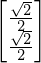

In [21]:
linear_light(pi/4)

In [22]:
def circular_light(kind='d'):
    """Luz circularmente polarizada
	   - kind, 'd': derecha   'i': izquierda
    	"""
    #Definicion del vector de Jones a dextrogiro o levogiro
    if kind == 'd':
        return Matrix([[1], [I]]) / sqrt(2)
    elif kind == 'i':
        return Matrix([[1], [-I]]) / sqrt(2)

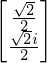

In [23]:
circular_light('d')

In [24]:
def elliptical_light(a=1, b=1, phase=0, theta=0):
    """Luz elipticamente polarizada
	   - a: amplitude de eje x
	   - b: amplitude de eje y
	   - phase: phase entre ambos ejes
	   - theta: rotation del haz respecto de eje x
    	"""
    #Definicion del vector de Jones
    M = Matrix([[a], [b * exp(I * phase)]], dtype=complex)
    return rotation(theta) * M

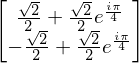

In [25]:
elliptical_light(a=1, b=1, phase=pi/4, theta=pi/4)